# Introduction

In this notebook we test different choices of hyperparameters for our baseline dqn-agent with the objective to optimise the model performance.

This part of the first project: *Navigation* of **Deep Reinforcement Learning for Enterprise** Course in *Udacity*.

## 0 - Importing Packages

Importing all required packages.

In [1]:
from unityagents import UnityEnvironment
import random
import torch
import numpy as np
import pandas as pd
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
from training_dqn_agent import dqn

## 1 - Initialising Environment

Initialising Unity environment to analyse.

In [2]:
env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

## 2 - Definiting Hyperparameters

Defining a dictionary with all hyperparameters used as inputs in the learning model.

In [4]:
dic = {'n_episodes': 2000,
       'max_t': 1000,
       'eps_start': 1.0,
       'eps_end': 0.01,
       'eps_decay':0.995,
       'fc1_units':64,
       'fc2_units':64,
       'buffer_size': int(1e5),
       'batch_size': 64,
       'gamma':0.99,
       'tau': 1e-3,
       'lr': 1e-4,
       'update_every': 4
      }

## 3 - Training model

### 3.1 - Preliminaries

Defining two useful functions to transform the scores an times results dictionaries into dataframes.

In [4]:
def maxlen(dic):
    l = 0
    for e in dic.values():
        if len(e) > l:
            l = len(e)
    return l

In [5]:
def dic_fix(dic):
    dicF = {}
    ml = maxlen(dic)
    for i , e in enumerate(dic.values()):
        new = [None] * (ml - len(e))
        dicF[i] = e + new
    return dicF

Initialising dictionaries to collect results.

In [6]:
scores_dic = {}
times_dic = {}

### 3.2 - Defining hyperparameter shocks

Creating a dictionary with the rota of the hyperparameter shocks that we will test:
* dictionary keys: name of the scenarios,
* dictionary values: tuple with name of hyperparameter, type of shock - absolute or relative, size of the shock.

In [23]:
shocks_rota = {'max_t +': ('max_t', 'abs', 2000),
              'max_t -': ('max_t', 'abs', 500),
              'eps_start -': ('eps_start', 'rel', 0.5),
              'eps_end +': ('eps_end', 'rel', 2),
              'eps_end -': ('eps_end', 'rel', 0.5),
              'eps_decay +': ('eps_decay', 'abs', 0.999),
              'eps_decay -': ('eps_decay', 'abs', 0.9),
              'fc1_units +': ('fc1_units', 'abs', 128),
              'fc1_units -': ('fc1_units', 'abs', 32),
              'fc2_units +': ('fc2_units', 'abs', 128),
              'fc2_units -': ('fc2_units', 'abs', 32),
              'buffer_size +': ('buffer_size', 'abs', int(1e6)),
              'buffer_size -': ('buffer_size', 'abs', int(1e04)),
              'batch_size +': ('batch_size', 'abs', 128),
              'batch_size -': ('batch_size', 'abs', 32),
              'gamma +': ('gamma', 'abs', 0.9999),
              'gamma -': ('gamma', 'abs', 0.9),
              'tau +': ('tau', 'abs', 1e-2),
              'tau -': ('tau', 'abs', 1e-4),
              'lr +': ('lr', 'abs', 1e-3),
              'lr -': ('lr', 'abs', 1e-5),
              'update_every +': ('update_every', 'abs', 8),
              'update_every -': ('update_every', 'abs', 2)
             }

### 3.3 - Training loop

Looping through the shocks defined in the shocks rota.

In [9]:
for k, v in shocks_rota.items():
    print('Applying shock:\t' + k)
    dic_shocked = dic.copy()
    if v[1] == 'rel':
        dic_shocked[v[0]] = dic[v[0]] * v[2]
    else:
        dic_shocked[v[0]] = v[2]
        
    scores, times = dqn(env, dic_shocked)
    
    scores_dic[k] = scores
    times_dic[k] = times

Applying shock:	max_t +
Episode 100	Average Score: 0.36	Time Split: 85.27			 
Episode 200	Average Score: 3.60	Time Split: 75.17			 
Episode 300	Average Score: 7.65	Time Split: 74.92			 
Episode 400	Average Score: 10.30	Time Split: 74.50			 
Episode 500	Average Score: 11.67	Time Split: 76.14			 
Episode 544	Average Score: 13.02	Time Elapsed: 418.45
Environment solved in 444 episodes!	Average Score: 13.02	Time Elapsed: 418.45
Applying shock:	max_t -
Episode 100	Average Score: 0.93	Time Split: 72.73			 
Episode 200	Average Score: 4.55	Time Split: 72.95			 
Episode 300	Average Score: 6.86	Time Split: 73.87			 
Episode 400	Average Score: 10.66	Time Split: 74.43			 
Episode 500	Average Score: 12.41	Time Split: 74.52			 
Episode 528	Average Score: 13.04	Time Elapsed: 389.31
Environment solved in 428 episodes!	Average Score: 13.04	Time Elapsed: 389.31
Applying shock:	eps_start -
Episode 100	Average Score: 2.27	Time Split: 72.36			 
Episode 200	Average Score: 6.44	Time Split: 72.40			 
Episode 

### 3.3 - Storing data

Making dictionaries all same size.

In [10]:
scores_dic_fix = dic_fix(scores_dic)
times_dic_fix = dic_fix(times_dic)

Passing them on to a DataFrame structure.

In [11]:
scores_df = pd.DataFrame(scores_dic_fix)
times_df = pd.DataFrame(times_dic_fix)

Storing the DataFrames into csv files for analysis in the next section.

In [12]:
scores_df.to_csv('scores_hyperparameters_analysis.csv')
times_df.to_csv('times_hyperparameters_analysis.csv')

## 4 - Analysing the data

### 4.1 - Loading the data

In [21]:
scores_df = pd.read_csv('scores_hyperparameters_analysis.csv', index_col=0)
times_df = pd.read_csv('times_hyperparameters_analysis.csv', index_col=0)

In [39]:
columns_names = {str(i): k for i,k in enumerate(shocks_rota.keys())}

In [41]:
scores_df.rename(columns=columns_names, inplace=True)
times_df.rename(columns=columns_names, inplace=True)

### 4.2 - Analysing time

In this section we analyse the distribution of amount of time taken to train the model to succeed for the different hyperparameter shocks.

In [60]:
total_times = times_df.sum()

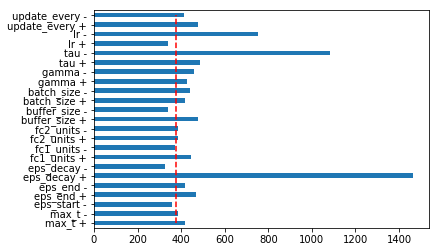

In [61]:
ax = total_times.plot.barh()
ax.vlines(375, ymin = 0, ymax=22, linestyles='dashed', label='baseline', colors='r')

In [62]:
total_times[total_times < 375]

eps_start -      358.050044
eps_decay -      324.727990
fc1_units -      372.452799
buffer_size -    342.075704
lr +             342.091138
dtype: float64

Shocks that performed statistically significantly better - to a standard deviation - under "learning time" measure were:
* smaller starting epsilon number
* smaller epsilon decay
* fewer units in the first deep layer
* smaller buffer size
* higher learning rate

### 4.3 - Analysing total number of episodes

In this section we anlyse the total number of episodes required to achieve success for the different shocks.

In [63]:
total_episodes = scores_df.count() - 100

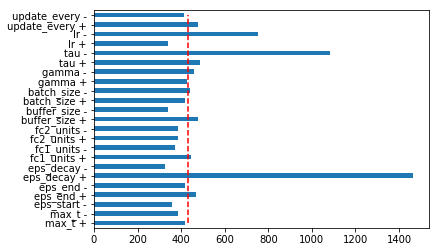

In [69]:
ax = total_times.plot.barh()
ax.vlines(430, ymin = 0, ymax=22, linestyles='dashed', label='baseline', colors='r')

In [70]:
total_episodes[total_episodes < 430]

max_t -           428
eps_start -       393
eps_decay -       363
fc1_units -       429
buffer_size -     391
batch_size +      425
lr +              376
update_every -    387
dtype: int64

Shocks that performed statistically significantly better - to a standard deviation - under "total number of episodes" measure were:
* smaller starting epsilon number
* smaller epsilon decay
* smaller buffer size
* higher learning rate
* more frequent network update 

### 4.2 - Visualising the rolling scores

In [65]:
rolling = scores_df.rolling(100).mean()

In [66]:
rolling_vol = scores_df.rolling(100).std()

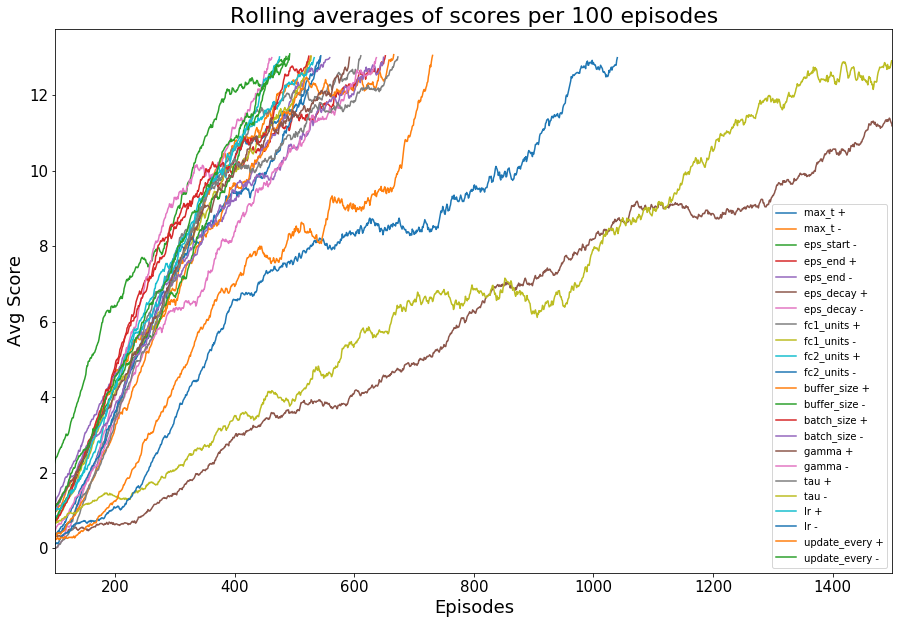

In [75]:
ax = rolling.plot(xlim=(100,1500), figsize=(15, 10), fontsize=15)
ax.set_xlabel("Episodes", fontsize=18)
ax.set_ylabel("Avg Score", fontsize=18)
ax.set_title("Rolling averages of scores per 100 episodes", fontsize=22)
ax.figure.savefig("RollAvgHyp.png")

Text(0.5, 1.0, 'Rolling volatility of scores per 100 episodes')

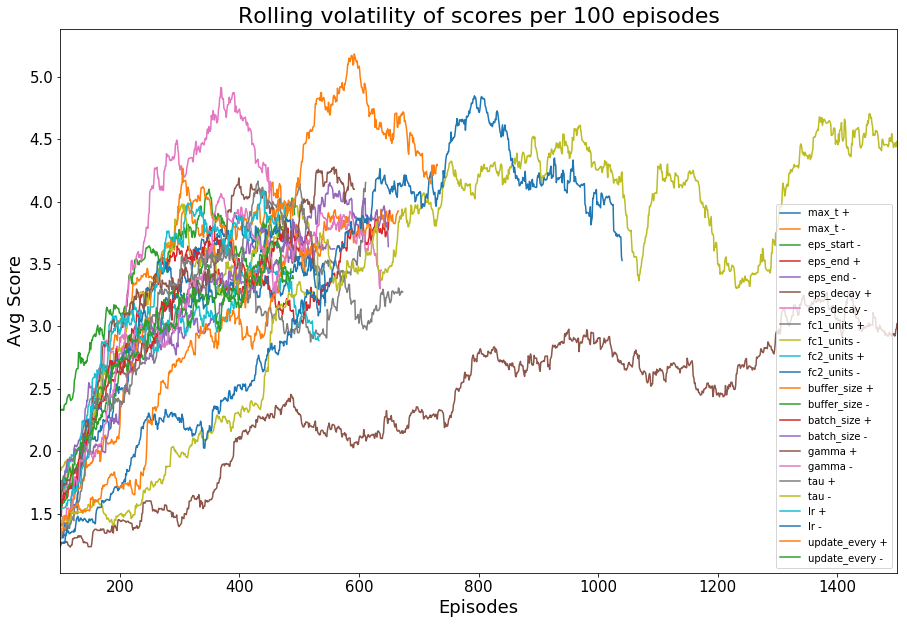

In [76]:
ax = rolling_vol.plot(xlim=(100,1500), figsize=(15, 10), fontsize=15)
ax.set_xlabel("Episodes", fontsize=18)
ax.set_ylabel("Avg Score", fontsize=18)
ax.set_title("Rolling volatility of scores per 100 episodes", fontsize=22)

## 5 - Further hyperparameter testing

We will used the optimal values found in the different shocks altogether to define a new hyperparameter dictionary to feed the model.

We will also reduce first deep layer number of units as that speeded up learning without affecting performance.

In [7]:
dic2 = {'n_episodes': 2000,
       'max_t': 1000,
       'eps_start': 0.5,
       'eps_end': 0.01,
       'eps_decay':0.9,
       'fc1_units':32,
       'fc2_units':64,
       'buffer_size': int(1e4),
       'batch_size': 64,
       'gamma':0.99,
       'tau': 1e-3,
       'lr': 1e-3,
       'update_every': 2
      }

### 5.1 - Defining new shocks

We will continue our analysis in the directions where the performance of the model improved in terms of fewer number of episodes required to achieve success:
* smaller starting epsilon number
* smaller epsilon decay
* smaller buffer size
* higher learning rate
* more frequent network update

In [8]:
shocks_rota_2 = {'base': ('max_t', 'abs', 1000),
               
              'eps_start +': ('eps_start', 'abs', 0.7),
              'eps_start -': ('eps_start', 'abs', 0.3),
              
              'eps_decay +': ('eps_decay', 'abs', 0.92),
              'eps_decay -': ('eps_decay', 'abs', 0.75),
               
              'buffer_size +': ('buffer_size', 'abs', int(2e4)),
              'buffer_size -': ('buffer_size', 'abs', int(1e3)),
               
              'lr +': ('lr', 'abs', 1e-2),
              'lr -': ('lr', 'abs', 1e-4),
               
              'update_every +': ('update_every', 'abs', 3),
              'update_every -': ('update_every', 'abs', 1)
             }

### 5.2 - Training loop

In [9]:
for k, v in shocks_rota_2.items():
    print('Applying shock:\t' + k)
    dic_shocked = dic2.copy()
    if v[1] == 'rel':
        dic_shocked[v[0]] = dic[v[0]] * v[2]
    else:
        dic_shocked[v[0]] = v[2]
        
    scores, times = dqn(env, dic_shocked)
    
    scores_dic[k] = scores
    times_dic[k] = times

Applying shock:	base
Episode 100	Average Score: 4.19	Time Split: 88.94			 
Episode 200	Average Score: 10.68	Time Split: 83.95			 
Episode 291	Average Score: 13.07	Time Elapsed: 250.21
Environment solved in 191 episodes!	Average Score: 13.07	Time Elapsed: 250.21
Applying shock:	eps_start +
Episode 100	Average Score: 2.77	Time Split: 86.36			 
Episode 200	Average Score: 8.06	Time Split: 84.35			 
Episode 300	Average Score: 9.27	Time Split: 84.77			 
Episode 400	Average Score: 9.13	Time Split: 87.55			 
Episode 500	Average Score: 8.19	Time Split: 102.02			 
Episode 600	Average Score: 9.04	Time Split: 89.11			 
Episode 700	Average Score: 9.88	Time Split: 82.37			 
Episode 800	Average Score: 8.90	Time Split: 91.29			 
Episode 900	Average Score: 10.58	Time Split: 82.84			 
Episode 1000	Average Score: 9.40	Time Split: 85.95			 
Episode 1100	Average Score: 11.27	Time Split: 81.91			 
Episode 1200	Average Score: 11.58	Time Split: 82.22			 
Episode 1300	Average Score: 11.02	Time Split: 83.01			 

### 5.3 - Saving results

In [10]:
scores_dic_fix = dic_fix(scores_dic)
times_dic_fix = dic_fix(times_dic)
scores_df = pd.DataFrame(scores_dic_fix)
times_df = pd.DataFrame(times_dic_fix)
scores_df.to_csv('scores_hyperparameters_second_analysis.csv')
times_df.to_csv('times_hyperparameters_second_analysis.csv')

### 5.4 - Loanding results

In [13]:
scores_df = pd.read_csv('scores_hyperparameters_second_analysis.csv', index_col=0)
times_df = pd.read_csv('times_hyperparameters_second_analysis.csv', index_col=0)

In [15]:
columns_names = {str(i): k for i,k in enumerate(shocks_rota_2.keys())}

In [16]:
scores_df.rename(columns=columns_names, inplace=True)
times_df.rename(columns=columns_names, inplace=True)

### 5.5 - Visualising results

In [17]:
rolling = scores_df.rolling(100).mean()

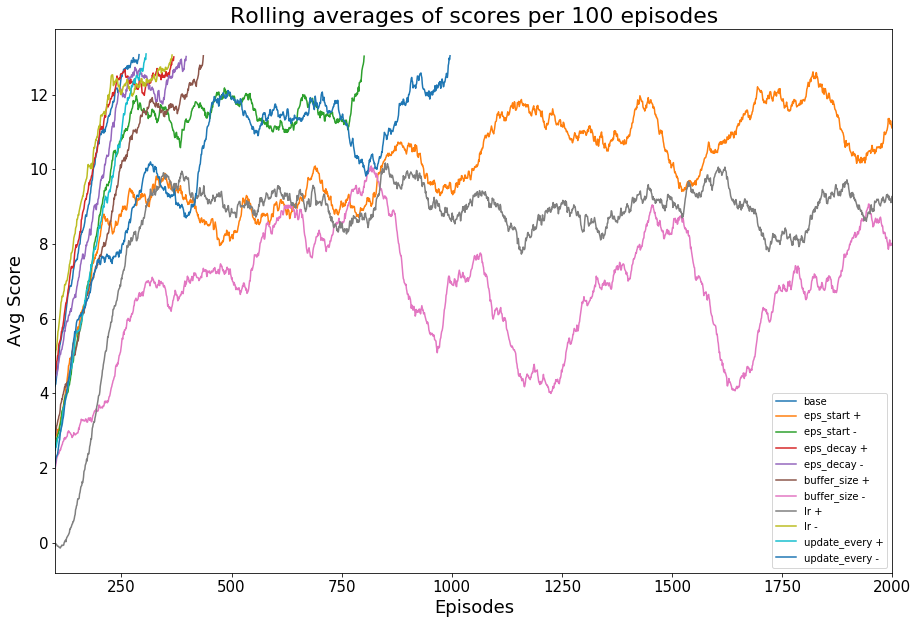

In [18]:
ax = rolling.plot(xlim=(100,2000), figsize=(15, 10), fontsize=15)
ax.set_xlabel("Episodes", fontsize=18)
ax.set_ylabel("Avg Score", fontsize=18)
ax.set_title("Rolling averages of scores per 100 episodes", fontsize=22)
ax.figure.savefig("RollAvgHyp2.png")

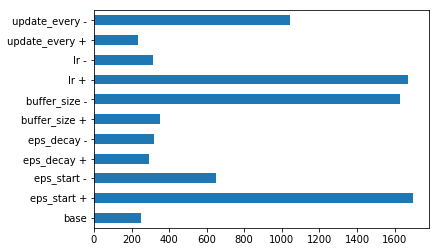

In [21]:
times_df.sum().plot.barh()

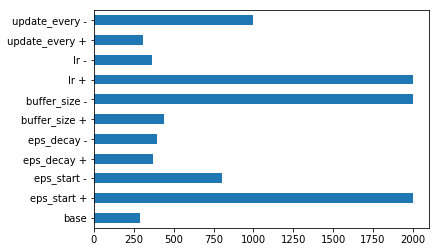

In [22]:
scores_df.count().plot.barh()

Base had a quite hight performance. We still picked the shocks in the direction that improved results if they were statistically similar to base.
* update every increase,
* learning rate decrease,
* buffer size increase,
* epsilon decay rate increse

That became our hyperparameters setting for our final setup.

## 6 - Final setup analysis

We will load the hyperparameters for our final setup.

In [7]:
dic_final = {'n_episodes': 2000,
       'max_t': 1000,
       'eps_start': 0.5,
       'eps_end': 0.01,
       'eps_decay':0.92,
       'fc1_units':32,
       'fc2_units':64,
       'buffer_size': int(2e4),
       'batch_size': 64,
       'gamma':0.99,
       'tau': 1e-3,
       'lr': 1e-4,
       'update_every': 3
      }

And collect training data to analyse the final setup performace statistics.

In [8]:
for i in range(250):
    print('Test number:\t' + str(i))
    scores, times = dqn(env, dic_final)
    scores_dic[i] = scores
    times_dic[i] = times

Test number:	0
Episode 100	Average Score: 1.18	Time Split: 77.43			 
Episode 200	Average Score: 6.71	Time Split: 80.95			 
Episode 300	Average Score: 9.87	Time Split: 75.00			 
Episode 400	Average Score: 11.49	Time Split: 75.16			 
Episode 424	Average Score: 13.04	Time Elapsed: 326.64
Environment solved in 324 episodes!	Average Score: 13.04	Time Elapsed: 326.64
Test number:	1
Episode 100	Average Score: 3.17	Time Split: 74.83			 
Episode 200	Average Score: 9.42	Time Split: 74.89			 
Episode 300	Average Score: 10.58	Time Split: 74.23			 
Episode 385	Average Score: 13.00	Time Elapsed: 287.44
Environment solved in 285 episodes!	Average Score: 13.00	Time Elapsed: 287.44
Test number:	2
Episode 100	Average Score: 1.72	Time Split: 74.71			 
Episode 200	Average Score: 4.66	Time Split: 75.15			 
Episode 300	Average Score: 11.46	Time Split: 75.09			 
Episode 328	Average Score: 13.00	Time Elapsed: 245.99
Environment solved in 228 episodes!	Average Score: 13.00	Time Elapsed: 245.99
Test number:	3
E

Episode 400	Average Score: 9.92	Time Split: 75.23			 
Episode 500	Average Score: 12.61	Time Split: 75.46			 
Episode 507	Average Score: 13.04	Time Elapsed: 382.04
Environment solved in 407 episodes!	Average Score: 13.04	Time Elapsed: 382.04
Test number:	51
Episode 100	Average Score: 1.70	Time Split: 75.01			 
Episode 200	Average Score: 6.88	Time Split: 75.49			 
Episode 300	Average Score: 11.31	Time Split: 75.69			 
Episode 400	Average Score: 11.47	Time Split: 75.35			 
Episode 487	Average Score: 13.01	Time Elapsed: 367.23
Environment solved in 387 episodes!	Average Score: 13.01	Time Elapsed: 367.23
Test number:	52
Episode 100	Average Score: -0.23	Time Split: 74.50			 
Episode 200	Average Score: 6.57	Time Split: 75.03			 
Episode 300	Average Score: 10.99	Time Split: 75.08			 
Episode 351	Average Score: 13.00	Time Elapsed: 263.74
Environment solved in 251 episodes!	Average Score: 13.00	Time Elapsed: 263.74
Test number:	53
Episode 100	Average Score: 2.90	Time Split: 75.07			 
Episode 200

Episode 100	Average Score: 3.87	Time Split: 78.37			 
Episode 200	Average Score: 8.84	Time Split: 78.80			 
Episode 300	Average Score: 12.59	Time Split: 79.19			 
Episode 327	Average Score: 13.00	Time Elapsed: 257.67
Environment solved in 227 episodes!	Average Score: 13.00	Time Elapsed: 257.67
Test number:	101
Episode 100	Average Score: 0.80	Time Split: 78.25			 
Episode 200	Average Score: 5.30	Time Split: 79.06			 
Episode 300	Average Score: 12.29	Time Split: 79.36			 
Episode 318	Average Score: 13.00	Time Elapsed: 250.92
Environment solved in 218 episodes!	Average Score: 13.00	Time Elapsed: 250.92
Test number:	102
Episode 100	Average Score: 3.41	Time Split: 78.22			 
Episode 200	Average Score: 10.16	Time Split: 78.82			 
Episode 300	Average Score: 11.86	Time Split: 78.86			 
Episode 369	Average Score: 13.01	Time Elapsed: 290.39
Environment solved in 269 episodes!	Average Score: 13.01	Time Elapsed: 290.39
Test number:	103
Episode 100	Average Score: 2.66	Time Split: 78.47			 
Episode 2

Episode 384	Average Score: 13.06	Time Elapsed: 324.15
Environment solved in 284 episodes!	Average Score: 13.06	Time Elapsed: 324.15
Test number:	150
Episode 100	Average Score: 0.35	Time Split: 83.80			 
Episode 200	Average Score: 5.60	Time Split: 84.17			 
Episode 300	Average Score: 9.64	Time Split: 84.64			 
Episode 367	Average Score: 13.05	Time Elapsed: 309.29
Environment solved in 267 episodes!	Average Score: 13.05	Time Elapsed: 309.29
Test number:	151
Episode 100	Average Score: 5.22	Time Split: 84.02			 
Episode 200	Average Score: 11.08	Time Split: 85.73			 
Episode 300	Average Score: 12.87	Time Split: 84.61			 
Episode 302	Average Score: 13.03	Time Elapsed: 256.05
Environment solved in 202 episodes!	Average Score: 13.03	Time Elapsed: 256.05
Test number:	152
Episode 100	Average Score: 1.83	Time Split: 83.57			 
Episode 200	Average Score: 7.71	Time Split: 83.99			 
Episode 300	Average Score: 11.50	Time Split: 84.17			 
Episode 341	Average Score: 13.00	Time Elapsed: 286.23
Environmen

Episode 300	Average Score: 10.36	Time Split: 85.24			 
Episode 360	Average Score: 13.01	Time Elapsed: 307.15
Environment solved in 260 episodes!	Average Score: 13.01	Time Elapsed: 307.15
Test number:	202
Episode 100	Average Score: 3.68	Time Split: 84.72			 
Episode 200	Average Score: 10.57	Time Split: 85.56			 
Episode 282	Average Score: 13.00	Time Elapsed: 240.64
Environment solved in 182 episodes!	Average Score: 13.00	Time Elapsed: 240.64
Test number:	203
Episode 100	Average Score: 1.49	Time Split: 85.20			 
Episode 200	Average Score: 6.78	Time Split: 85.66			 
Episode 300	Average Score: 10.78	Time Split: 85.66			 
Episode 370	Average Score: 13.00	Time Elapsed: 316.37
Environment solved in 270 episodes!	Average Score: 13.00	Time Elapsed: 316.37
Test number:	204
Episode 100	Average Score: 3.21	Time Split: 84.61			 
Episode 200	Average Score: 8.81	Time Split: 85.13			 
Episode 300	Average Score: 11.41	Time Split: 85.51			 
Episode 338	Average Score: 13.02	Time Elapsed: 287.68
Environme

Saving the data.

In [9]:
scores_dic_fix = dic_fix(scores_dic)
times_dic_fix = dic_fix(times_dic)
scores_df = pd.DataFrame(scores_dic_fix)
times_df = pd.DataFrame(times_dic_fix)
scores_df.to_csv('scores_final_analysis.csv')
times_df.to_csv('times_final_analysis.csv')


In [12]:
scores_dic_fix = dic_fix(scores_dic)
times_dic_fix = dic_fix(times_dic)
scores_df = pd.DataFrame(scores_dic_fix)
times_df = pd.DataFrame(times_dic_fix)
scores_df.to_csv('scores_2_analysis.csv')
times_df.to_csv('times_2_analysis.csv')

Loading the data.

In [13]:
scores_df = pd.read_csv('scores_final_analysis.csv', index_col=0)
times_df = pd.read_csv('times_final_analysis.csv', index_col=0)

Analysing the distribution of training time.

In [18]:
total_times = times_df.sum()
total_times.describe()

count    250.000000
mean     286.668408
std       78.229876
min      154.516135
25%      235.356535
50%      269.737813
75%      322.678002
max      596.110265
dtype: float64

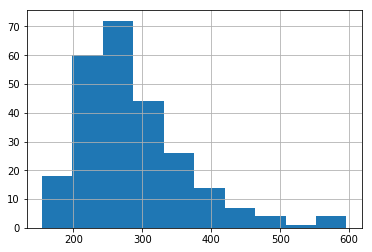

In [17]:
total_times.hist(bins=10)

In [19]:
total_times.skew()

1.3577098667158722

In [20]:
total_times.kurt()

2.3241655029439428

We were able to reduce significantly the average time needed to succeed by performing hyperparameters tuning to **285** but distribution has a larger standard deviation **75** and a fatter tail requiring longer training periods in some occasions. Maximum of 600 seconds registered at training in this setup compared with 450 in the base case.

The graph above seems to be hinting to a Poisson distribution.

Analysing the distribution of total number of episodes.

In [22]:
total_episodes = scores_df.count() - 100
total_episodes.describe()

count    250.000000
mean     272.188000
std      101.289996
min      106.000000
25%      202.000000
50%      251.500000
75%      311.250000
max      713.000000
dtype: float64

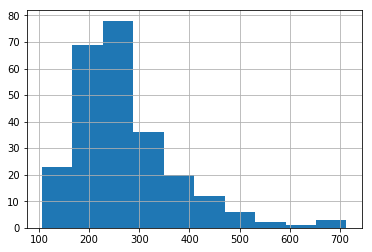

In [23]:
total_episodes.hist(bins=10)

Same story with the number of episodes. Much better performance at **250 - 270 episodes** needed on average but higher dispersion with **100 episodes** of standard deviation.

Analysing the rolling averages dynamics.

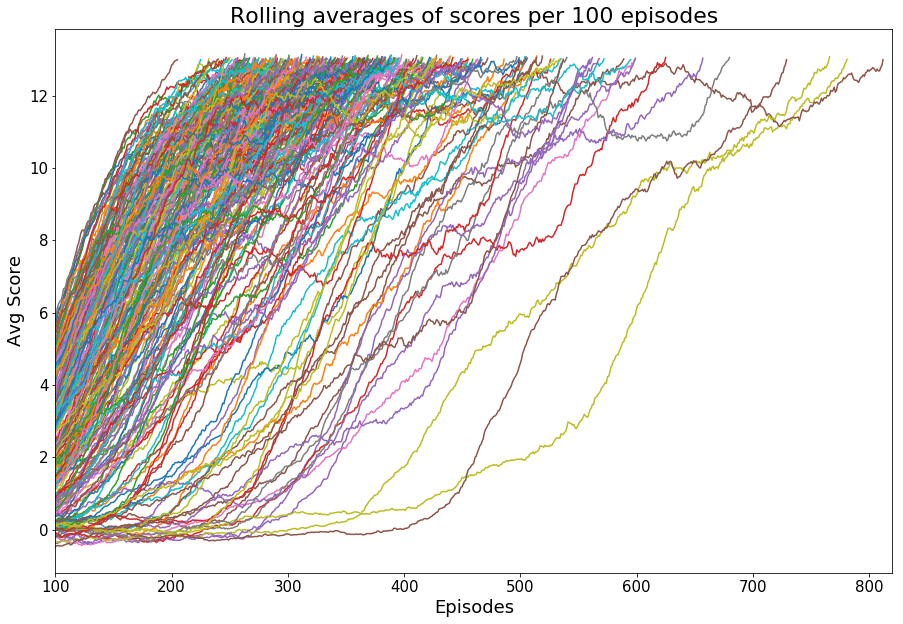

In [26]:
rolling = scores_df.rolling(100).mean()
ax = rolling.plot(legend=None, xlim=(100,820), figsize=(15, 10), fontsize=15)
ax.set_xlabel("Episodes", fontsize=18)
ax.set_ylabel("Avg Score", fontsize=18)
ax.set_title("Rolling averages of scores per 100 episodes", fontsize=22)
ax.figure.savefig("RollAvgFinal.png")

## A - Appendix

We are having one last look at the performance of the previous base case for hyperparameters setup.

In [7]:
dic_previous_base = {'n_episodes': 2000,
       'max_t': 1000,
       'eps_start': 0.5,
       'eps_end': 0.01,
       'eps_decay':0.9,
       'fc1_units':32,
       'fc2_units':64,
       'buffer_size': int(1e4),
       'batch_size': 64,
       'gamma':0.99,
       'tau': 1e-3,
       'lr': 1e-3,
       'update_every': 2
      }

In [8]:
for i in range(30):
    print('Test number:\t' + str(i))
    scores, times = dqn(env, dic_previous_base)
    scores_dic[i] = scores
    times_dic[i] = times

Test number:	0
Episode 100	Average Score: 4.77	Time Split: 85.93			 
Episode 200	Average Score: 8.93	Time Split: 81.69			 
Episode 300	Average Score: 10.94	Time Split: 81.72			 
Episode 363	Average Score: 13.04	Time Elapsed: 300.98
Environment solved in 263 episodes!	Average Score: 13.04	Time Elapsed: 300.98
Test number:	1
Episode 100	Average Score: 4.75	Time Split: 81.13			 
Episode 200	Average Score: 8.42	Time Split: 81.27			 
Episode 300	Average Score: 12.10	Time Split: 81.70			 
Episode 400	Average Score: 12.43	Time Split: 81.37			 
Episode 500	Average Score: 11.97	Time Split: 81.79			 
Episode 600	Average Score: 12.36	Time Split: 82.01			 
Episode 663	Average Score: 13.01	Time Elapsed: 540.85
Environment solved in 563 episodes!	Average Score: 13.01	Time Elapsed: 540.85
Test number:	2
Episode 100	Average Score: 2.43	Time Split: 81.36			 
Episode 200	Average Score: 6.25	Time Split: 82.12			 
Episode 300	Average Score: 9.39	Time Split: 81.61			 
Episode 400	Average Score: 11.23	Time 

In [9]:
scores_dic_fix = dic_fix(scores_dic)
times_dic_fix = dic_fix(times_dic)
scores_df = pd.DataFrame(scores_dic_fix)
times_df = pd.DataFrame(times_dic_fix)
scores_df.to_csv('scores_appendix_base_analysis.csv')
times_df.to_csv('times_appendix_base_analysis.csv')

In [10]:
scores_df = pd.read_csv('scores_appendix_base_analysis.csv', index_col=0)

In [11]:
total_episodes = scores_df.count() - 100
total_episodes.describe()

count      30.000000
mean      646.533333
std       509.487825
min       155.000000
25%       272.250000
50%       433.500000
75%       867.500000
max      1900.000000
dtype: float64

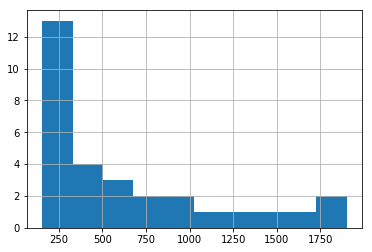

In [15]:
total_episodes.hist(bins=10)

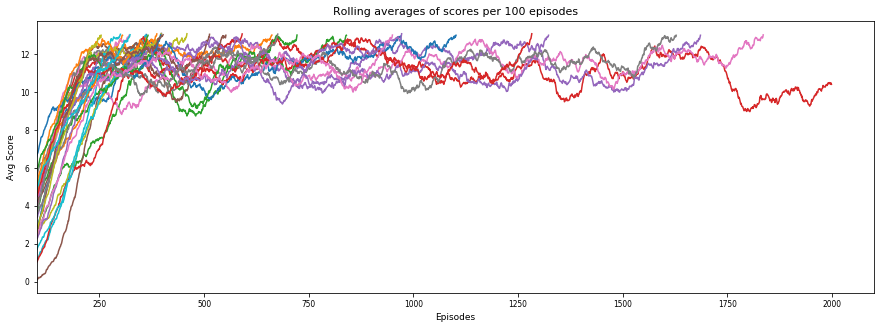

In [20]:
rolling = scores_df.rolling(100).mean()
ax = rolling.plot(legend=None, xlim=(100,2100), figsize=(15, 5), fontsize=7.5)
ax.set_xlabel("Episodes", fontsize=9)
ax.set_ylabel("Avg Score", fontsize=9)
ax.set_title("Rolling averages of scores per 100 episodes", fontsize=11)
ax.figure.savefig("RollAvgAppendix.png")

In [21]:
env.close()